<a href="https://colab.research.google.com/github/pranesh313/diamler_17_jan/blob/main/10_LoanRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Science & Analysis 
### Project: Credit Risk Assessment 

# Abstract

You are hired as part of a data analysis & science team at a fintech start up. The start up has offered loans of $£1,000$ to $1000$ customers in various groups of interest in order to collect data on their likelihood of repayment.  

Your role is to offer an account of what factors lead to loan default. And thereby advise the new company on its loan strategy. 

The company has collected the following data:

```
 "ID",         Customer ID
 "Income",     Annual Pre-Tax Income on-application
 "Term" ,      Short or Long Term (6mo or 12mo)
 "Balance",    Current Account Balance on-application
 "Debt" ,      Outstanding Debt on-application
 "Score",      Credit Score (from referencing agency)
 "Default"     Observed Default (True = Default, False = Settle
```

...and would like a technical report produced which characterises the data collected (quality) and offers analysis. 



# Part 1: Data Structure

### Q. Import pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q. Read in the loan data

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/loan_data.csv",delimiter=',',index_col='ID',dtype={'Term': 'string'})


### Q. Show dataframe (/table) schema & structure

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

### Q. Review and comment on structure

1. SCORE column has some missing values and this needs to be checked
2. Normalization needed because the range between min and max is too huge - Some values could affect the final equation to a larger extent


In [8]:
#making sure that the Term column is also being used for analysis
encoding_logic = lambda x: 12 if x.strip() == "Long Term" else 6
dataset['Term_duration'] = dataset['Term'].map(encoding_logic)

### Q. Use descriptive statistics to check data for initial quality and sense

* HINT: `.describe()` 
* HINT: `include=`

### Q. Report specifically on missing data

* HINT: `.isna()`
* HINT: `.sum()`

In [12]:
dataset.groupby(['Term','Default']).count()

Income  Balance  Debt  Score  Term_duration
Term       Default                                             
Long Term  False       241      241   241    237            241
           True         31       31    31     31             31
Short Term False       527      527   527    513            527
           True         57       57    57     55             57

# Part 2: Data Preparation

### Q. Create a clean dataset without rows with missing values

In [13]:
newdataset = dataset.dropna(axis=0)

In [14]:
#Checking if the data set is still intact - now with the dropped values in the 'Score' column
newdataset.groupby(['Term','Default']).count()

Income  Balance  Debt  Score  Term_duration
Term       Default                                             
Long Term  False       237      237   237    237            237
           True         31       31    31     31             31
Short Term False       513      513   513    513            513
           True         55       55    55     55             55

### Q. Check that dropping rows hasnt biased the data

* EXTRA: t-test to establish cleaning hasn't biased...

# Part 3: Exploratory Numerical Analysis

### Q. Review possible correlatons

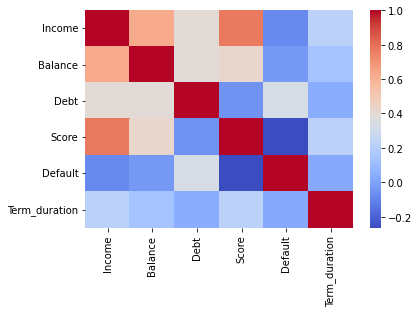

In [22]:
corr_matrix = newdataset.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')

Correlation Information

1. SCORE and DEFAULT - Strong negative correlation
2. INCOME and DEFAULT - Medium negative correlation
3. BALANCE and DEFAULT - Medium negative correlation
4. TERM_DURATION and DEFAULT - Small negative correlation

For further analysis - Use Columns - Income, Balance and Score (may be Term_duration) --> Rest of the columns are not relevant

### Q. Interpret and characterise correlations

In [ ]:
# Reduce the dataset so that we deal only with the columns that have a correlation to the DEFAULT column
small_data_set = newdataset.loc[:,['Income', 'Balance', 'Score', 'Term_duration', 'Default']]

<Figure size 432x288 with 0 Axes>

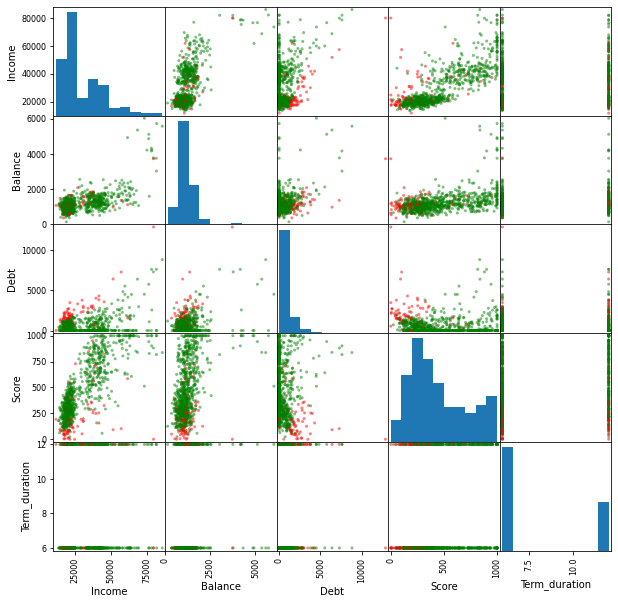

In [18]:
# Setting the color labels in Default column - True as RED and False and Green
def_encoded = small.loc[:,'Default']
def_encoding = lambda x: 'red' if x == True else 'green'
def_encoded = def_encoded.map(def_encoding)

plt.figure()
sm= pd.plotting.scatter_matrix(small_data_set,c=def_encoded,figsize=(10,10))s
plt.show()

Checking if normalization would help us get a better correlation data

In [ ]:
#Z-score the dataset



### Q. Perform a factor analysis using `groupby`

# Part 4: Exploratory Visual Analysis

### Q. Visualize the `Income` distribution

In [118]:
newdataset['Income'].describe().T

count      836.000000
mean     29907.177033
std      14020.786832
min      11800.000000
25%      19775.000000
50%      22900.000000
75%      39025.000000
max      86000.000000
Name: Income, dtype: float64

### Q. Visualize Income relationships

### Q. Visualize `Default` relationships

### Q. Extend the visual analysis to explore all columns

# Part 5: Stretch

### Q. Export this document as a report and produce a word version

In [ ]:
!pip install pandoc

In [ ]:
!pandoc -o report.docx *.html 